In [1]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

# current state: 0, 0

circuit.x(0) # NOT
# current state: 1, 0

circuit.cx(0, 1) # CNOT, conditional not
# current state: 1, 1

circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [2]:
from qiskit import IBMQ

IBMQ.save_account("ee45e51c64e6416c2aa5dabdf214971c97d99d6e0900f609d6748304b0d86fa11fa348149475fe289b7dfa0d6cd3f908abaf26f46b20145579e526c376291ac3")


configrc.store_credentials:WARNING:2022-04-04 15:06:53,541: Credentials already present. Set overwrite=True to overwrite.


In [3]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 3 qued and simulated qubits
ibmq_armonk has 11 qued and 1 qubits
ibmq_santiago has 27 qued and 5 qubits
ibmq_bogota has 120 qued and 5 qubits
ibmq_lima has 20 qued and 5 qubits
ibmq_belem has 5 qued and 5 qubits
ibmq_quito has 1 qued and 5 qubits
simulator_statevector has 3 qued and simulated qubits
simulator_mps has 3 qued and simulated qubits
simulator_extended_stabilizer has 2 qued and simulated qubits
simulator_stabilizer has 1 qued and simulated qubits
ibmq_manila has 14 qued and 5 qubits


In [6]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_quito")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


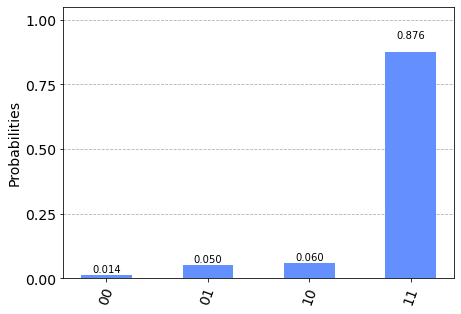

In [7]:
from qiskit.visualization import plot_histogram
from matplotlib import style

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [11]:
circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

# current state: 0, 0

circuit.h(0) # Hadamard gate
# current state: superposition of all

circuit.cx(0, 1) # CNOT, conditional not flips second if first is a 1
# current state: 00 or 11

circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐┌─┐
q_0: ┤ H ├┤M├
     └┬─┬┘└╥┘
q_1: ─┤M├──╫─
      └╥┘  ║ 
c: 2/══╩═══╩═
       1   0

In [12]:
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


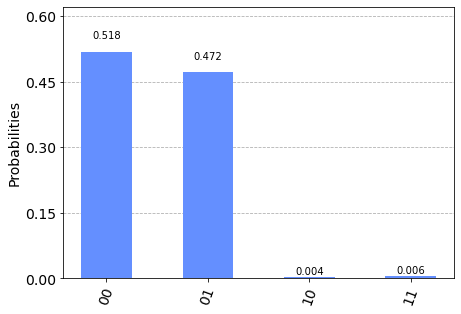

In [13]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [14]:
from qiskit import Aer # simulator framework

sim_backend = Aer.get_backend("qasm_simulator")

Job Status: job has successfully run


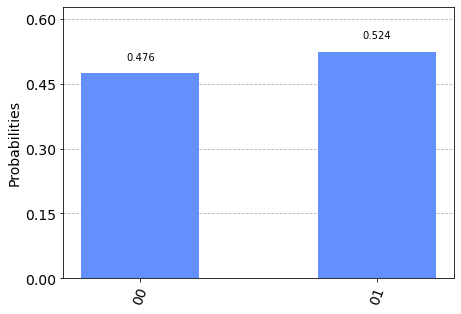

In [15]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])